# MACS 30150
## Problem Set 6
## Songrun He

### Problem 1

### (a)
Import the data using pandas.read csv() function. Look for characters that seem out of place that might indicate missing values. Replace them with missing values using the na_values=... option.

In [2]:
import pandas as pd

df = pd.read_csv('data/Auto.csv', na_values = '?')
df.dropna(inplace = True)
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### (b)
Produce a scatterplot matrix which includes all of the quantitative variables (mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin).

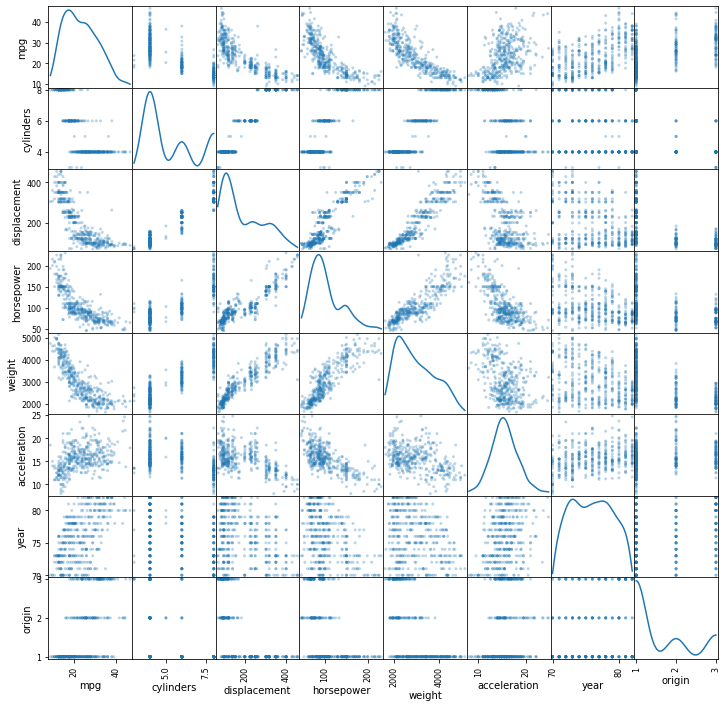

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(12, 12),diagonal='kde')
plt.show()

### (c)
Compute the correlation matrix for the quantitative variables (8*8) using the DataFrame.corr() method.

In [7]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (d)
Estimate the following multiple linear regression model of mpg on all other quantitative variables, where ui is an error term for each observation, using Python's statsmodels.api.OLS() function.

In [10]:
import statsmodels.api as sm
df['const'] = 1

reg = sm.OLS(endog=df['mpg'], exog=df[['const', 'cylinders', \
                'displacement', 'horsepower', 'weight', 'acceleration' \
                ,'year', 'origin']], missing='drop')
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        12:08:15   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

(1) The coefficients that are statistically significant at the 1% level: displacement, weight, year and origin

(2) The coefficients that are not statistically significant at the 10% level: cylinders, horsepower and acceleration

(3) Holding other variables constant, an increase of one year of vehicle year of the vehicle is expected to increase 0.7508 miles per gallon on average.

### (e)
Looking at your scatterplot matrix from part (b), what are the three variables that look most likely to have a nonlinear relationship with mpgi?

Based on the scatter plot, the variables displacement, horsepower and weight are most likely to have a nonlinear relationship with mpg.

In [11]:
df['displacement_2'] = df['displacement']**2
df['horsepower_2'] = df['horsepower']**2
df['weight_2'] = df['weight']**2
df['acceleration_2'] = df['acceleration']**2

reg2 = sm.OLS(endog=df['mpg'], exog=df[['const', 'cylinders', \
                'displacement', 'displacement_2', 'horsepower', \
                'horsepower_2', 'weight','weight_2', 'acceleration', \
                'acceleration_2','year', 'origin']], missing='drop')

results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 17 Feb 2020   Prob (F-statistic):          1.75e-160
Time:                        12:21:59   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             20.1084      6.696      3.

(2) The adjusted R square for this model is 0.866, which is better than the 0.818 from the previous model.

(3) The coefficient of displacement is no longer significant at 1% or even 10% level. The squared term of displacement is not significant at even 10% level as well.

(4) The cylinders variable is still not statistically significant at 10% level. Actually, its p-value increases from 0.128 to 0.408.

### (f)
Using the regression model from part (e) and the .predict() function, what would be the predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1?

In [14]:
pre = results2.predict(exog=[1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15.1, 15.1**2, 99,1])[0]
print('The predicted results is:',pre)

The predicted results is: 38.732111098017086


### Problem 2

In [15]:
df2 = pd.DataFrame([[0, 3, 0, 'Red'], [2, 0, 0, 'Red'], [0, 1, 3, 'Red'], \
                           [0, 1, 2, 'Green'], [-1, 0, 1, 'Green'], [1, 1, 1, 'Red']])
df2.columns = ['X1', 'X2', 'X3', 'Y']
df2.index+=1
df2

,X1,X2,X3,Y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


### (a)
Compute the Euclidean distance between each observation and the test point X1 = X2 = X3 = 0.

In [16]:
df2['dist'] = (df2['X1'] ** 2 + df2['X2'] ** 2 + df2['X3'] ** 2) ** 0.5
df2

,X1,X2,X3,Y,dist
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


The above table gives us the distance of each observation to the test point X1 = X2 = X3 = 0

### (b)

When K = 1, the closest observation to X1 = X2 = X3 = 0 is observation number 5. Therefore, our KNN prediction would be green.

### (c)

When K =3, the three nearest neighbors to X1 = X2 = X3 = 0 is observation 2, 5 and 6. Since both 2 and 6 have a value of red. Therefore, our KNN prediction would be red.

### (d)

If the Bayes (optimal) decision boundary in the problem is highly non-linear, then we would expect the best value for K to be small. Because when the boundary is non-linear, we need K to be small to capture such dynamics. Otherwise, the nonlinear boundary will be smoothed out by large number of nearest observations. Therefore, we would expect a small value of K to better predict the value of certain point.

### (e)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
X = [[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]]
y = ['red','red','red','green','green','red']
K_n = KNeighborsClassifier(n_neighbors=2, weights='distance')
cls = K_n.fit(X, y)
print('The KNN classifier of the test point is',cls.predict([[1,1,1]])[0])

The KNN classifier of the test point is red


### Problem 3

### (a)
Use statsmodel.api to estimate the logistic regression of mpg high on the regressors from Exercise 1: number of cylinders (cyl), engine displacement (dspl), horsepower (hpwr), vehicle weight (wgt), acceleration (accl), vehicle year (yr), vehicle origin (orgn). Make sure to include a constant term. Report all the regressors that have coecients that are statistically significant at the 5% level (p <= 0.05).

In [18]:
# Create a variable indicating high mpg
import numpy as np

med = df['mpg']>=df['mpg'].median()
df['mpg_high'] = np.where(med,1,0)

reg3 = sm.Logit(endog=df['mpg_high'], exog=df[['const', 'cylinders', \
                'displacement', 'horsepower', 'weight', 'acceleration' \
                ,'year', 'origin']], missing='drop')
results3 = reg3.fit()
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Mon, 17 Feb 2020   Pseudo R-squ.:                  0.7101
Time:                        12:57:26   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

The regressors that have coefficients that are statistically significant at 5% level are: weight and year. 

### (b)

In [32]:
from sklearn.model_selection import train_test_split
Y = df['mpg_high']
X = df[['cylinders', 'displacement','horsepower', 'weight', \
        'acceleration', 'year', 'origin']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, \
                    test_size = 0.5, random_state=10)

### (c)

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=10, solver='lbfgs', \
    multi_class='multinomial', max_iter=1000).fit(X_train, y_train)
print('The estimated intercept is: ',clf.intercept_)
print('The estimated coefficients are: ',clf.coef_[0])

The estimated intercept is:  [-0.10026869]
The estimated coefficients are:  [-0.65773519  0.00857663 -0.01766136 -0.00257161 -0.10958242  0.16735562
 -0.04697382]


### (d)

In [39]:
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
score

0.8724489795918368

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[86 13]
 [12 85]]


In [41]:
from sklearn.metrics import classification_report
print("Classification report:")
print(classification_report(y_pred, y_test,target_names=['Low mpg', 'High mpg']))

Classification report:
              precision    recall  f1-score   support

     Low mpg       0.87      0.88      0.87        98
    High mpg       0.88      0.87      0.87        98

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



The above result shows almost same F1 score for both low MPG and high MPG. Therefore, we have almost equal predicting performance for both low MPG and high MPG cars. 